## Desafio 1

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.

Pesquise no repositório de classificadores pré-treinados de Haar, um classificador de sorriso e exiba em tela a área referente ao retângulo do sorriso detectado.

Por se tratar de um componente de face, avalie combinar mais que um classificador.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [ ]:
%cd fiap-ml-visao-computacional/aula-4-classificacao-objetos-analise-facial/desafio-1/

Importação de bibliotecas.

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 2. Solução

Construir uma função que receba uma imagem, analise se exista um rosto humano e identifique um sorriso. O tamanho identificado do sorriso pode identificar alguma intensidade.

Retorne a imagem com o tamanho do sorrido incluído na imagem de entrada, bem como com o retângulo delimitador nele.

In [ ]:
face_classifier = cv2.CascadeClassifier('../classificadores/haarcascade_frontalface_default.xml')
smile_classifier = cv2.CascadeClassifier('../classificadores/haarcascade_smile.xml')
    
def identificar_sorriso(imagem):
    
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces is ():
         cv2.putText(imagem, "rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)

    for (x,y,w,h) in faces:
        
        cv2.rectangle(imagem, (x,y), (x+w, y+h), (255,255,0), 1)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = imagem[y:y+h, x:x+w]
        
        smile = smile_classifier.detectMultiScale(roi_gray, 1.7, 22, minSize=(25, 25))

        for (x, y, w, h) in smile:
            cv2.rectangle(roi_color, (x, y), (x+w, y+h), (255,255,0), 1)
            tamanho = int(w) * int(h)
            cv2.putText(imagem, "sorriso %s pixels"%(tamanho), (50,80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)
            break

    return imagem

Faça o teste utilizando uma imagem de câmera.

Este método é de uso exclusivo do Colab, uma vez que não temos acesso direto a câmera do dispositivo.

Obtido dos [snippets avançados](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq) do Google Colab.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Função que obtem a foto da câmera do navegador e salva em uma pasta determinada.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("imagens/foto.jpg")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Text(0.5, 1.0, 'Sorriso')

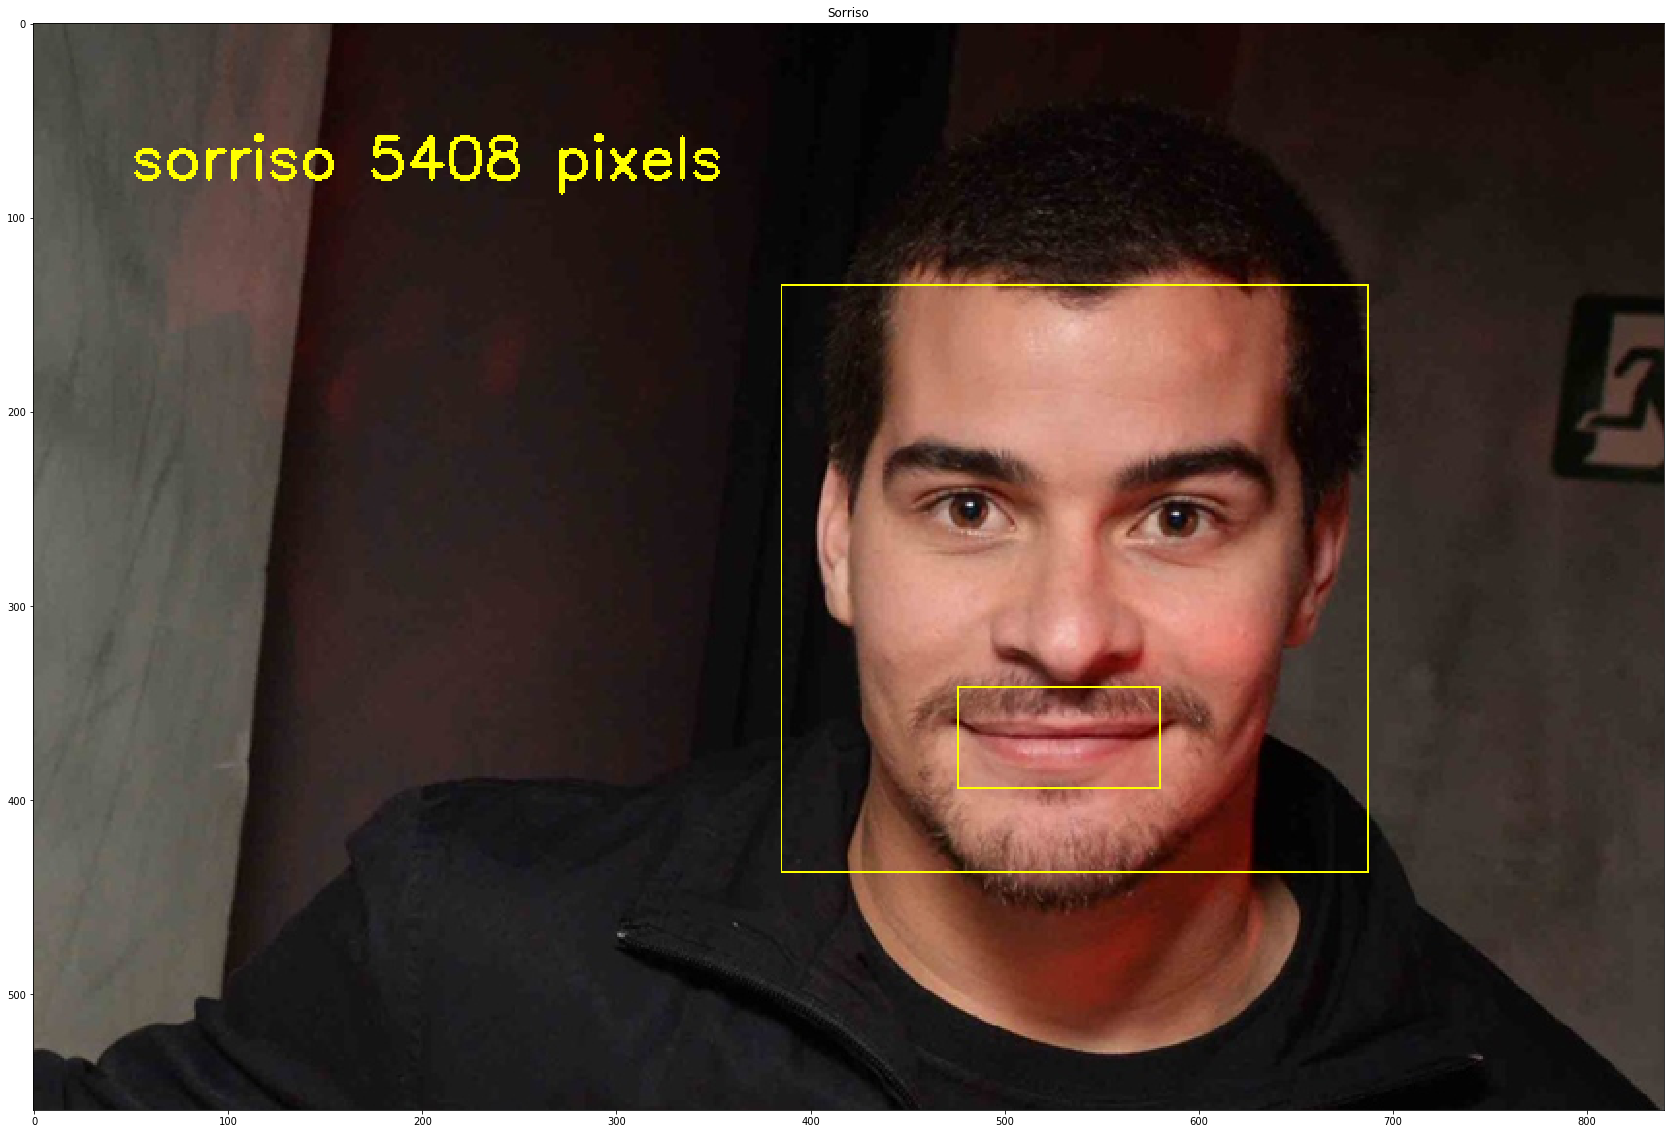

In [16]:
imagem = cv2.imread("imagens/foto.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_proc = identificar_sorriso(imagem)

plt.figure(figsize=(30,20))
plt.imshow(imagem_proc)
plt.title("Sorriso")